# MScFE 642 DEEP LEARNING FOR FINANCE
## Group Work Project # 1
### Student Group 8422
### Yesheng Huang, Atakan Devrent, Mukiza Rayner

In this project, we are aiming to analyze daily prices of the TSLA stock for the last 2000 days. Then, we are going to build an **MLP** using the **PyTorch** framework to predict both the prices and log returns of the stock, separately. As our last work, we are going to transform our time series data for **Gramian Angular Field** representation and try to predict the prices and log returns of the stock using **Convolutional Neural Networks**.

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
from datetime import date, timedelta
import statsmodels
from statsmodels.tsa.stattools import adfuller
import torch
import torchinfo

We first download our data and select only the **Close** column. Then, we generate log returns to make the time series stationary.

In [18]:
end_date = date(2025, 2, 10)
start_date = end_date - timedelta(days=2000)
ticker = "TSLA"

data = yf.download(ticker, start_date, end_date)
data = data.droplevel(1, axis=1)

# Generate log returns
data["log_r"] = data["Close"].apply(np.log).diff()
data.dropna(inplace=True)

# Drop extra columns
data = data.loc[:, ["Close", "log_r"]]
print(data)

[*********************100%***********************]  1 of 1 completed

Price            Close     log_r
Date                            
2019-08-22   14.810000  0.005960
2019-08-23   14.093333 -0.049601
2019-08-26   14.333333  0.016886
2019-08-27   14.272000 -0.004288
2019-08-28   14.372667  0.007029
...                ...       ...
2025-02-03  383.679993 -0.053090
2025-02-04  392.209991  0.021989
2025-02-05  378.170013 -0.036454
2025-02-06  374.320007 -0.010233
2025-02-07  361.619995 -0.034517

[1374 rows x 2 columns]


### Step 1.a

    Gather information on the time series of the prices (i.e. the levels) of any security of your choice: equity, cryptocurrencies, options, bonds, volatilities... Provide a characterization of the main properties of that time series: summary statistics about its distribution, persistence, stationarity...

In [27]:
prices = data["Close"]

print(prices)
print("-"*50)
print(prices.describe())

Date
2019-08-22     14.810000
2019-08-23     14.093333
2019-08-26     14.333333
2019-08-27     14.272000
2019-08-28     14.372667
                 ...    
2025-02-03    383.679993
2025-02-04    392.209991
2025-02-05    378.170013
2025-02-06    374.320007
2025-02-07    361.619995
Name: Close, Length: 1374, dtype: float64
--------------------------------------------------
count    1374.000000
mean      203.997657
std        97.000367
min        14.093333
25%       155.787498
50%       216.809998
75%       259.286674
max       479.859985
Name: Close, dtype: float64


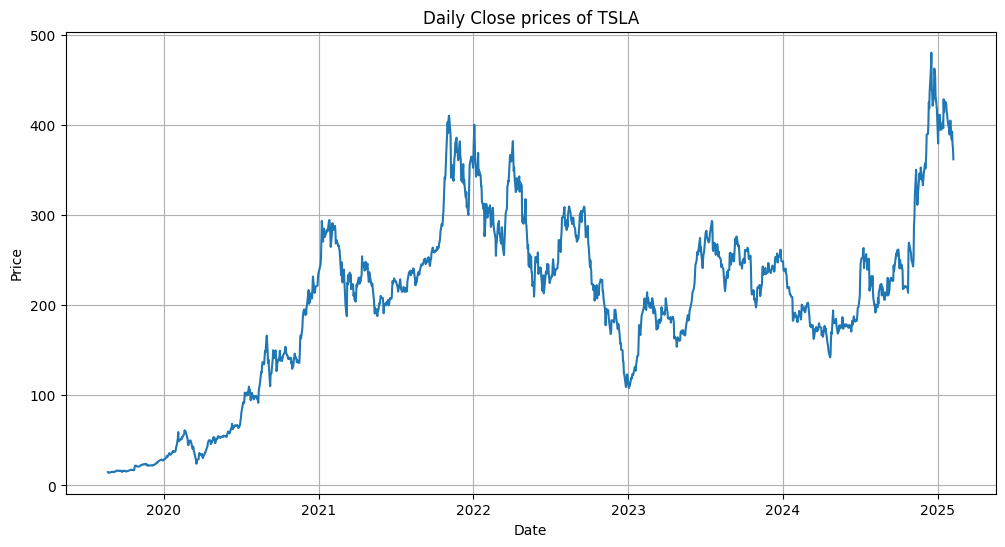

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(data["Close"])
plt.title("Daily Close prices of TSLA")
plt.ylabel("Price")
plt.xlabel("Date")
plt.grid()

Eye-balling the chart, we can guess that the price of TSLA stock is not stationary. However, to be precise, we apply **Augmented Dickey-Fuller** test to check for stationarity.

In [25]:
adftest = adfuller(data["Close"])
print('ADF Statistic: %f' % adftest[0])
print('ADF p-value: %f' % adftest[1])

ADF Statistic: -2.119408
ADF p-value: 0.236783


According to the result of the ADF test, we cannot reject the null hypothesis of non-stationarity.